# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [14]:
clusterer = KMeans(n_clusters=8)
cluster_labels = clusterer.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", 8,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 8 The average silhouette_score is : 0.5398971441034137


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [15]:
clusterer = KMeans(n_clusters=5)
cluster_labels = clusterer.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", 5,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.5489993239795691


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [16]:
clusterer = KMeans(n_clusters=3)
cluster_labels = clusterer.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", 3,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.5711381937868844


In [27]:
clusterer = KMeans(n_clusters=4)
cluster_labels = clusterer.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", 4,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 4 The average silhouette_score is : 0.5620323449580352


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

/home/flori/.local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f0eb8ab8d10>,
                 k=None, locate_elbow=True, metric='silhouette', model=None,
                 timings=False)

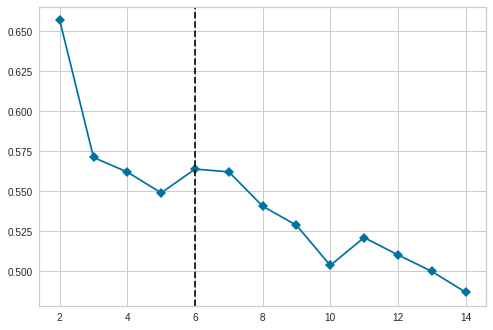

In [17]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), metric="silhouette", timings=False)
visualizer.fit(X)

/home/flori/.local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f0eb88f6a90>,
                 k=None, locate_elbow=True, metric='calinski_harabasz',
                 model=None, timings=False)

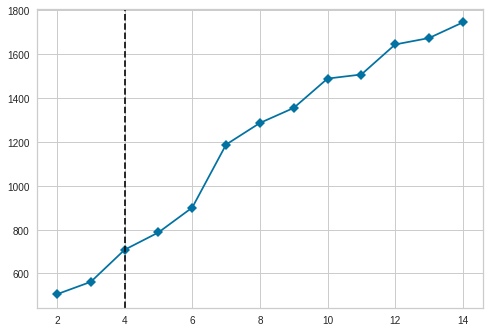

In [19]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), metric="calinski_harabasz", timings=False)
visualizer.fit(X)

/home/flori/.local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f0eb884c390>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=False)

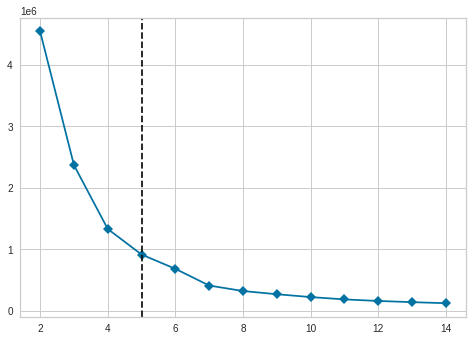

In [20]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), metric="distortion", timings=False)
visualizer.fit(X)

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

/home/flori/.local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f0eb91a3550>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=False)

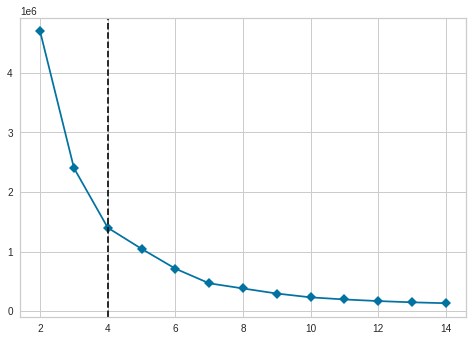

In [24]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,15), metric="distortion", timings=False)
visualizer.fit(X)

/home/flori/.local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f0eb87ac750>,
                 k=None, locate_elbow=True, metric='calinski_harabasz',
                 model=None, timings=False)

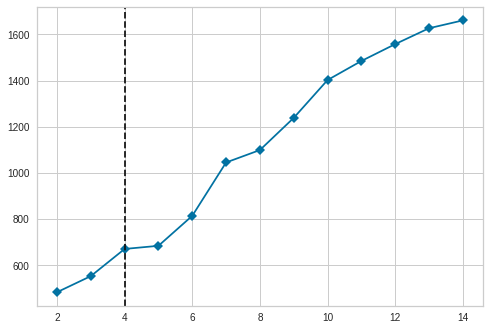

In [26]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,15), metric="calinski_harabasz", timings=False)
visualizer.fit(X)

/home/flori/.local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f0eb7fb84d0>,
                 k=None, locate_elbow=True, metric='silhouette', model=None,
                 timings=False)

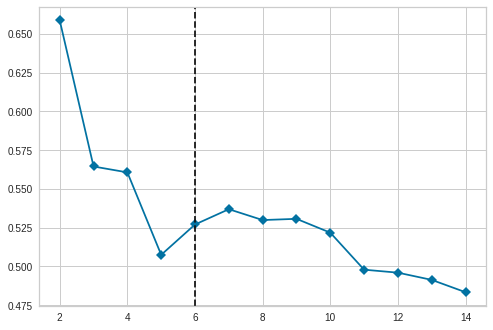

In [29]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,15), metric="silhouette", timings=False)
visualizer.fit(X)

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [39]:
# Voy a usar 3 clusters que es el que mejores métricas saca y k-means porque para 3-clusters el silhouette score es mejor
clusterer = KMeans(n_clusters=3)
clusterer.fit_predict(X)
X["labels"] = clusterer.labels_
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,labels
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2


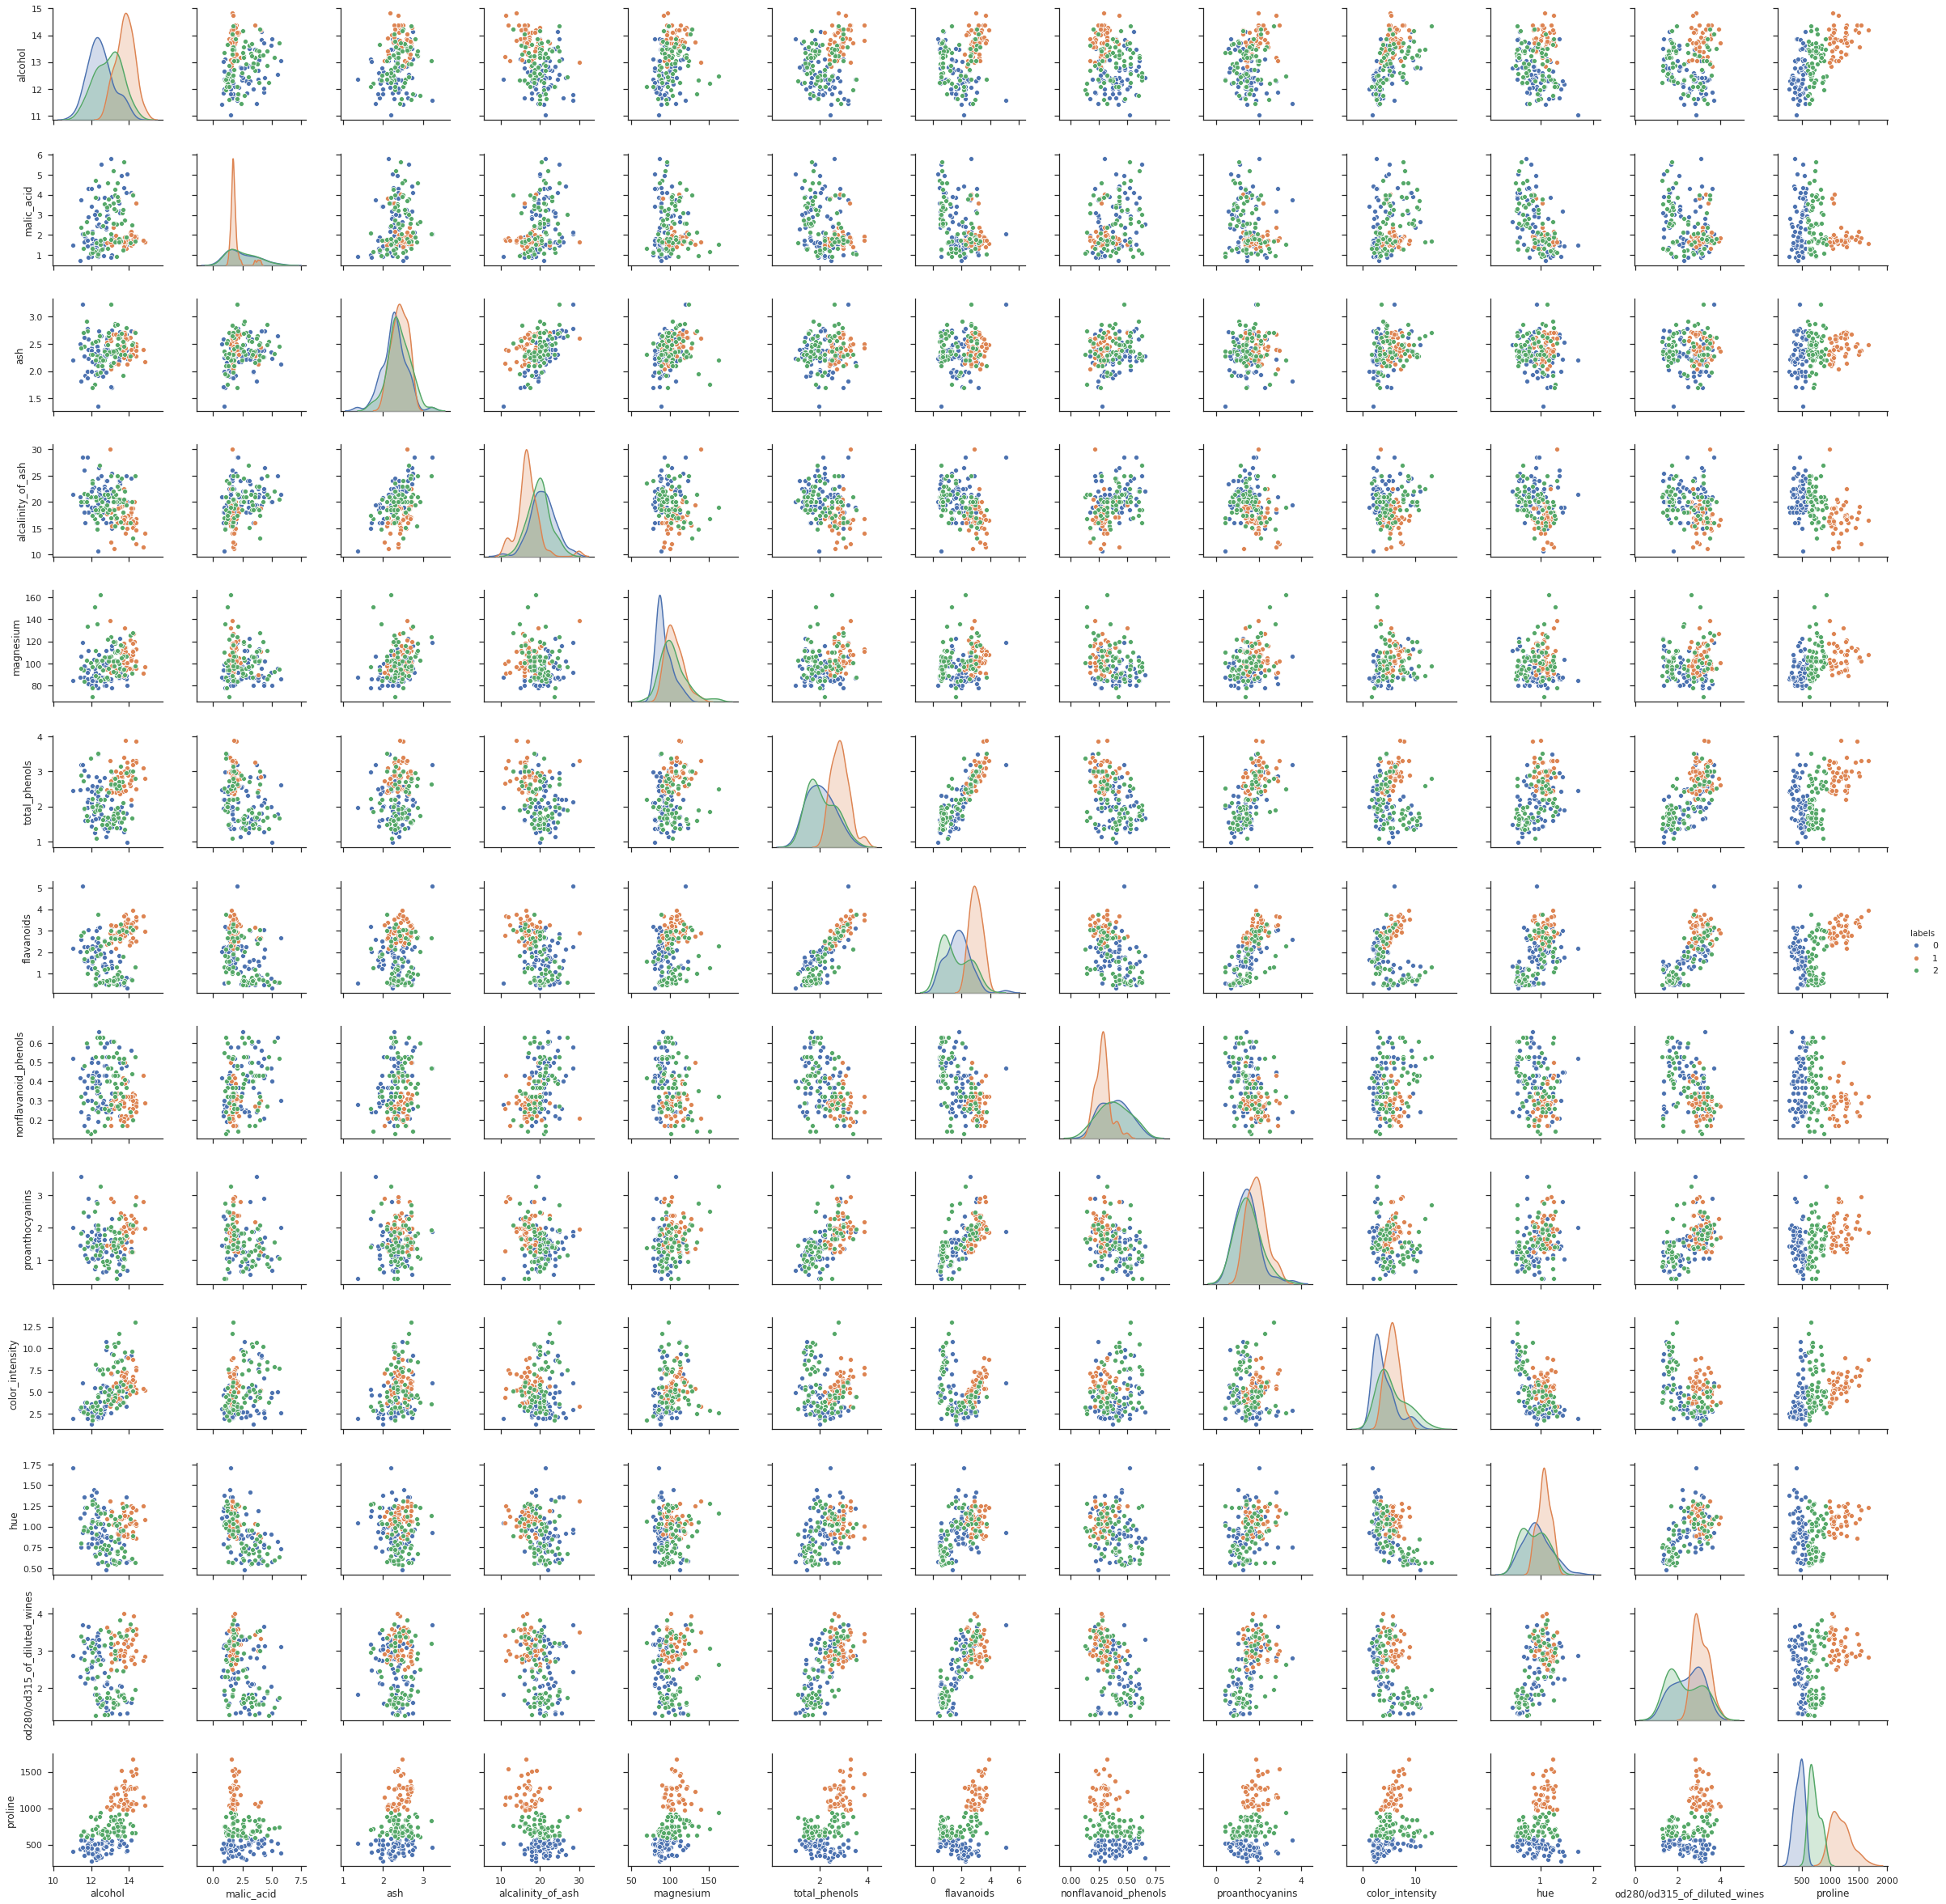

In [40]:
sns.set(style="ticks")
sns.pairplot(X, hue="labels")

En muchas features los clusters se solapan. La feature prolina es la que mejor separa los clusters para kmeans con k=3

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

(178, 2)


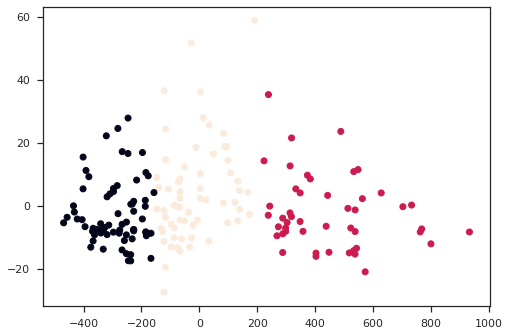

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(X)
print(data_2d.shape)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c= X["labels"])

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.